In [1]:
import tensorflow as tf
import pickle
import torch
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import numpy as np

In [2]:
data_file = '../pkl/ckp_with_img_geometry_106.pkl'
data_file = '../pkl/oulu_casia_with_img_geometry.pkl'
data_file = '../pkl/ckplus_with_img_geometry_3frame.pkl'
data_file = '../pkl/ck+_6_classes_img_and_55_landmark.pickle'
data_file = '../pkl/ck+_6_classes_img_and_55_landmark_106.pickle'
data_file = '../pkl/ck+_6_classes_img_and_55_landmark_106_shuffle.pickle'
data_file = '../data/ck+_6_classes_img_and_55_landmark_106_stratified.pickle'
data_file = '../data/ck+_6_classes_img_and_55_landmark_106_pair.pickle'
data_file = '../data/ck+_6_classes_img_and_55_landmark_106.pickle'
# data_file = '../pkl/oulu_6_classes_img_and_55_landmark.pickle'
# data_file = '../pkl/ck+_6_classes_img_and_55_landmark_4_crop.pickle'
# data_file = '../pkl/ck+_6_classes_img_hog_and_55_landmark_4_crop.pickle'
if not os.path.exists(data_file):
    print('file {0} not exists'.format(data_file))
    exit()
with open(data_file, 'rb') as f:
    data = pickle.load(f)

In [3]:
landmark = data[0]['landmark'][0]
print(landmark.reshape(55, 2).shape)
landmark = landmark.transpose((1, 0))

(55, 2)


In [4]:
def render_gaussian_heatmap(coord, output_shape, sigma):     
        x = [i for i in range(output_shape[1])]
        y = [i for i in range(output_shape[0])]
        xx, yy = tf.meshgrid(x,y)
        # print(xx, yy)
        # xx = tf.reshape(tf.to_float(xx), (1,*output_shape,1))
        # yy = tf.reshape(tf.to_float(yy), (1,*output_shape,1))          
        print(xx, yy)
        # x = tf.floor(tf.reshape(coord[:,:,0],[-1,1,1,cfg.num_AU_points]) / cfg.input_shape[1] * output_shape[1] + 0.5)
        # y = tf.floor(tf.reshape(coord[:,:,1],[-1,1,1,cfg.num_AU_points]) / cfg.input_shape[0] * output_shape[0] + 0.5)
        # heatmap = tf.exp(-(((xx-x)/tf.to_float(sigma))**2)/tf.to_float(2) -(((yy-y)/tf.to_float(sigma))**2)/tf.to_float(2))
        # return heatmap * 255.

In [5]:
def render_gaussian_heatmap(coord, output_shape, sigma, input_shape=(128, 128)):
        with torch.no_grad():
                x = [i for i in range(output_shape[1])]
                y = [i for i in range(output_shape[0])]
                x = torch.tensor(x, dtype=torch.float)
                y = torch.tensor(y, dtype=torch.float)
                grid_x, grid_y = torch.meshgrid(x, y)
                grid_x = grid_x.reshape(output_shape[0], output_shape[1], 1)
                grid_y = grid_y.reshape(output_shape[0], output_shape[1], 1)
                # print(grid_x, grid_y)
                x = torch.floor(coord[:, 0].reshape(1, 1, -1) / input_shape[1] * output_shape[1] + 0.5)
                y = torch.floor(coord[:, 1].reshape(1, 1, -1) / input_shape[0] * output_shape[0] + 0.5)
                print(x, y) 
                sigma = torch.tensor(sigma, dtype=torch.float)
                two = torch.tensor(2, dtype=torch.float)
                heatmap = torch.exp(-(((grid_x - x) / sigma) ** 2) / two  - (((grid_y - y) / sigma) ** 2/ two))

                res = heatmap.sum(dim=2).permute(1, 0)
                res = (res - torch.min(res)) / (torch.max(res) - torch.min(res))
                return res
        # print(xx, yy)
        # xx = tf.reshape(tf.to_float(xx), (1,*output_shape,1))
        # yy = tf.reshape(tf.to_float(yy), (1,*output_shape,1))          
        # print(heatmap.shape)
        # return heatmap * 255
        # x = tf.floor(tf.reshape(coord[:,:,0],[-1,1,1,cfg.num_AU_points]) / cfg.input_shape[1] * output_shape[1] + 0.5)
        # y = tf.floor(tf.reshape(coord[:,:,1],[-1,1,1,cfg.num_AU_points]) / cfg.input_shape[0] * output_shape[0] + 0.5)
        # heatmap = tf.exp(-(((xx-x)/tf.to_float(sigma))**2)/tf.to_float(2) -(((yy-y)/tf.to_float(sigma))**2)/tf.to_float(2))
        # return heatmap * 255.

In [66]:
landmark = torch.tensor(landmark, dtype=torch.float)
heatmap = render_gaussian_heatmap(landmark, (128, 128), 2)

tensor([[[ 22.,  29.,  39.,  49.,  59.,  70.,  79.,  88.,  98., 106.,  65.,
           66.,  66.,  67.,  56.,  61.,  67.,  72.,  76.,  34.,  40.,  46.,
           52.,  46.,  40.,  78.,  84.,  90.,  96.,  91.,  85.,  49.,  54.,
           60.,  66.,  72.,  79.,  84.,  81.,  72.,  67.,  60.,  53.,  84.,
           79.,  73.,  67.,  61.,  55.,  49.,  53.,  61.,  67.,  72.,  81.]]]) tensor([[[35., 29., 27., 29., 33., 32., 28., 24., 25., 30., 38., 46., 54., 62.,
          68., 70., 71., 70., 67., 40., 38., 37., 40., 40., 41., 39., 36., 35.,
          37., 38., 39., 84., 78., 76., 77., 76., 77., 82., 82., 81., 82., 82.,
          83., 82., 88., 91., 91., 91., 88., 84., 83., 83., 84., 82., 82.]]])
torch.Size([128, 128, 55])


tensor(2.9959) tensor(0.)


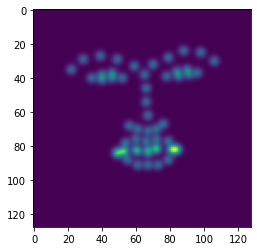

In [67]:
res = heatmap.sum(dim=2).permute(1, 0)
res = res / 255
print(torch.max(res), torch.min(res))
res = (res - torch.min(res)) / (torch.max(res) - torch.min(res))
# for i in range(32):
#     for j in range(32):
#         print(res[i, j])
plt.imshow(res)


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) torch.Size([32, 32])


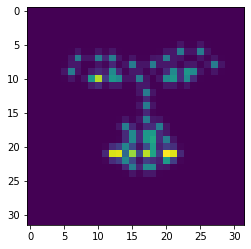

tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(9.6479e-42)
tensor(7.0037e-41)
tensor(9.6479e-42)
tensor(9.6479e-42)
tensor(7.0037e-41)
tensor(1.9296e-41)
tensor(7.0037e-41)
tensor(9.6479e-42)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(2.0896e-37)
tensor(4.6024e-33)
tensor(1.8567e-30)
tensor(1.3719e-29)
tensor(1.8613e-30)
tensor(1.8613e-30)
tensor(1.3719e-29)
tensor(1.8567e-30)
tensor(4.6024e-33)
tensor(2.0895e-37)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(2.0895e-37)
tensor(4.6024e-33)
tensor(1.8567e-30)
tensor(1.3719e-29)
tensor(1.8613e-30)
tensor(1.8613e-30)
tensor(1.3724e-29)
tensor(3.7135e-30)
tensor(1.3724e-29)
tensor(1.8567e-30)
tensor(4.6024e-33)
tensor(2.0902e-37)
tensor(9.6479e-42)
tensor(2.0897e-37)
tensor(5.2252e-33)
tensor(7.5091e-28)
tensor(1.6499e-23)
tensor(6.6562e-21)
tensor(4.9183e-20)
tensor(6.6727e-21)
tensor(6.6727e-21)
tensor(4.9183e-20)
tensor(6.6562e-21)
tensor(1.6499e-23)
tens

In [40]:
res = heatmap.sum(dim=2).permute(1, 0)
m1 = heatmap[:, :, 7]
print(m1, m1.shape)
plt.imshow(res)
plt.show()
for i in range(32):
    for j in range(32):
        print(res[i, j])

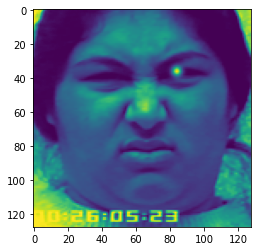

In [24]:
m1 = heatmap[:, :, 26]
m1 = m1.permute(1, 0)
img = data[0]['img'][0]
plt.imshow(img + m1.numpy())
plt.show()

(55, 2)


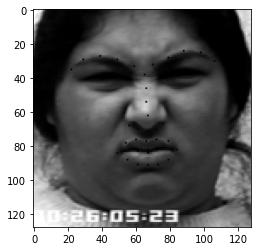

In [180]:
lm = landmark.numpy()
lm = data[0]['landmark'][0]
# print(lm)
lm = lm.transpose((1, 0))
# print(lm)
print(lm.shape)
# plt.gray()
img = data[0]['img'][0]
image = Image.fromarray(img)
draw = ImageDraw.Draw(image)
for i in range(55):
    # draw.point(lm[:, i])
    draw.point(lm[i, :])
    
    # draw.text(landmark[:, i], str(i))

plt.imshow(image)